In [78]:
from scipy import ndimage, datasets
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray
from skimage import io
from time import time

(512, 512)


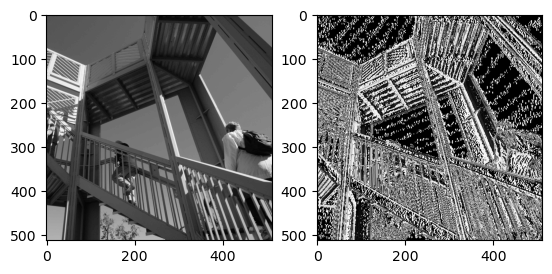

In [17]:
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ascent = datasets.ascent()
print(ascent.shape)
result = ndimage.sobel(ascent)
ax1.imshow(ascent)
ax2.imshow(result)
plt.show()

(1280, 1057)
Durations in seconds :  0.0065500736236572266


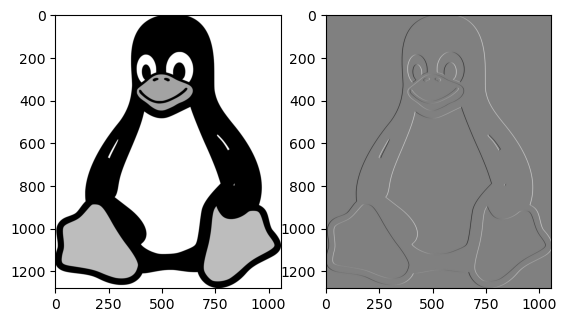

In [79]:
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
img = io.imread('linux.png', as_gray=True)
print(img.shape)
linux = asarray(img)
start = time()
result = ndimage.sobel(linux)
duration = time() - start
print("Durations in seconds : ", duration)
ax1.imshow(linux)
ax2.imshow(result)
plt.show()

Durations in seconds :  4.651911973953247


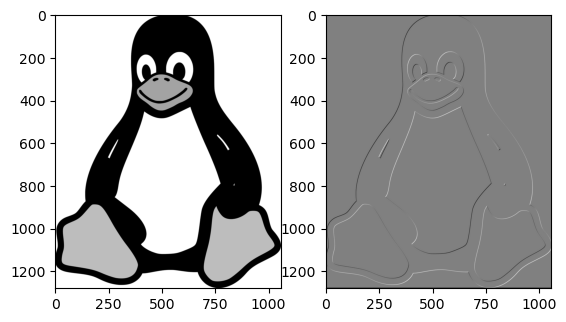

In [80]:
import numpy as np
def naive_sobel(img):
    sobelx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobely = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    out = np.zeros(img.shape)
    img = np.pad(img, pad_width = 3)
    padLen = 3
    for i in range(0, out.shape[0]):
        for j in range(0, out.shape[1]):
            outx = np.multiply(img[i+padLen:i+(2*padLen), j+padLen:j+(2*padLen)], sobelx).sum()
            outy = np.multiply(img[i+padLen:i+(2*padLen), j+padLen:j+(2*padLen)], sobely).sum()
            out[i, j] = outx + outy
            
    return out
    

fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
img = io.imread('linux.png', as_gray=True)
linux = asarray(img)
start = time()
out = naive_sobel(linux)
duration = time() - start
print("Durations in seconds : ", duration)
ax1.imshow(linux)
ax2.imshow(out)
plt.show()

In [89]:
import numpy as np
from os import environ
from multiprocessing.pool import ThreadPool
import threading

def thread_sobel(img):
    sobelx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobely = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    out = np.zeros(img.shape)
    outx = np.multiply(img, sobelx).sum()
    outy = np.multiply(img, sobely).sum()
    return outx + outy
    

fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
img = io.imread('linux.png', as_gray=True)
linux = asarray(img)
threads = list()

start = time()

for i in range(0,linux.shape[0]):
    for j in range(0, linux.shape[1]):
        x = threading.Thread(target=thread_sobel, args=(img[i:i+3, j:j+3]))
        threads.append(x)
        x.start()
    
for index, thread in enumerate(threads):
    thread.join()
duration = time() - start
print("Durations in seconds : ", duration)
ax1.imshow(linux)
ax2.imshow(np.array(threads))
plt.show()